In [198]:
import sys

import pandas as pd
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#% matplotlib inline
from datetime import datetime
import datefinder

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')
from sklearn.feature_extraction.text import CountVectorizer

import string
import gensim
import collections
from gensim.corpora import Dictionary

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

from autocorrect import Speller
import tldextract

from bs4 import BeautifulSoup
import requests
import csv
import time

import string
import gc
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx
from itertools import chain

import matplotlib as mpl
from pylab import rcParams

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sentence_transformers import SentenceTransformer
from bertopic.backend import WordDocEmbedder
from bertopic import BERTopic
import gensim.downloader as api
import hdbscan
import matplotlib.pyplot as plt

import umap

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Merging the collected json files from SerpAPI

##### Make a list of the files

In [2]:
# First listing out the names of all json files into a list
# as per the range of data files (related to page numbers)

files= []
string1 = 'serp_data/2012-2017/search_results_' # 2012-2017
string2 = '.json'

string3 = 'serp_data/2018-2019/search_results_' #2018-2019
string4 = 'serp_data/2020/search_results_'      #2020
string5 = 'serp_data/2021/search_results_'      #2021
string6 = 'serp_data/2022/search_results_'      #2022


for i in range(46):  # 2012-2017
    files.append(string1 + str(i) + string2)
    
for i in range(45):  #2018-2019
    files.append(string3 + str(i) + string2)
    
for i in range(30):  #2020
    files.append(string4 + str(i) + string2)
    
for i in range(48):  #2021
    files.append(string5 + str(i) + string2)
    
for i in range(35):  #2022
    files.append(string6 + str(i) + string2)    

##### Read and add them to a single pandas dataframe

In [3]:
# Create an empty dataframe and add the values from each json file of the list from it

data = pd.DataFrame()

for lst in files:
    with open(lst, 'r') as f:
        data_temp = json.load(f)
    data_temp = pd.json_normalize(data_temp, record_path =['organic_results'])
    data = pd.concat([data, data_temp], axis=0)  

In [4]:
data['index'] = range(1, len(data) + 1)
data

,position,title,result_id,type,link,snippet,resources,publication_info.summary,publication_info.authors,inline_links.serpapi_cite_link,...,inline_links.cited_by.serpapi_scholar_link,inline_links.related_pages_link,inline_links.serpapi_related_pages_link,inline_links.versions.total,inline_links.versions.link,inline_links.versions.cluster_id,inline_links.versions.serpapi_scholar_link,inline_links.cached_page_link,inline_links.html_version,index
0,0,Hateful symbols or hateful people? predictive ...,eG51Yln4CGsJ,Pdf,https://aclanthology.org/N16-2013.pdf,"… , NLP research on hate speech has been very ...","[{'title': 'aclanthology.org', 'file_format': ...","Z Waseem, D Hovy - Proceedings of the NAACL st...","[{'name': 'D Hovy', 'link': 'https://scholar.g...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:e...,https://serpapi.com/search.json?as_sdt=0%2C21&...,7.0,https://scholar.google.com/scholar?cluster=771...,7712687424659615352,https://serpapi.com/search.json?as_sdt=0%2C21&...,https://scholar.googleusercontent.com/scholar?...,NaN,1
1,1,The Bullying Game: Sexism Based Toxic Language...,m6JOssuaA8UJ,NaN,https://search.proquest.com/openview/7e6d1aa29...,"… Based on this classification method, the mac...",NaN,"A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - C...","[{'name': 'N Yıldırım', 'link': 'https://schol...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,Mean birds: Detecting aggression and bullying ...,nmwGhySbXz4J,NaN,https://dl.acm.org/doi/abs/10.1145/3091478.309...,… [36] perform hate speech detection on Yahoo ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:n...,https://serpapi.com/search.json?as_sdt=0%2C21&...,18.0,https://scholar.google.com/scholar?cluster=449...,4494481534325517470,https://serpapi.com/search.json?as_sdt=0%2C21&...,NaN,NaN,3
3,3,Hate is not binary: Studying abusive behavior ...,T3zAicbzZDkJ,NaN,https://dl.acm.org/doi/abs/10.1145/3078714.307...,… We perform an unsupervised machine learning ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:T...,https://serpapi.com/search.json?as_sdt=0%2C21&...,17.0,https://scholar.google.com/scholar?cluster=413...,4135698391873125455,https://serpapi.com/search.json?as_sdt=0%2C21&...,NaN,NaN,4
4,4,"On the Detection of Hate Speech, Hate Speakers...",qKtEpwXk55wJ,NaN,https://search.proquest.com/openview/395ac461a...,… of machine learning algorithms in understand...,"[{'title': 'cornell.edu', 'file_format': 'PDF'...",D Warmsley - 2017 - search.proquest.com,"[{'name': 'D Warmsley', 'link': 'https://schol...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:q...,https://serpapi.com/search.json?as_sdt=0%2C21&...,2.0,https://scholar.google.com/scholar?cluster=113...,11306256102469184424,https://serpapi.com/search.json?as_sdt=0%2C21&...,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14,Peer Support IDD Scoping Review Search,vHK6O-kNJ9EJ,NaN,https://scholarshare.temple.edu/handle/20.500....,To identify studies to include or consider for...,"[{'title': 'temple.edu', 'file_format': 'HTML'...","S Roth, B Pfeiffer, KE Weiss, S Aleong, L Karp...","[{'name': 'S Roth', 'link': 'https://scholar.g...",https://serpapi.com/search.json?engine=

In [5]:
data['index'].unique() # no. of results

array([   1,    2,    3, ..., 4027, 4028, 4029])

In [6]:
data.columns

Index(['position', 'title', 'result_id', 'type', 'link', 'snippet',
       'resources', 'publication_info.summary', 'publication_info.authors',
       'inline_links.serpapi_cite_link', 'inline_links.cited_by.total',
       'inline_links.cited_by.link', 'inline_links.cited_by.cites_id',
       'inline_links.cited_by.serpapi_scholar_link',
       'inline_links.related_pages_link',
       'inline_links.serpapi_related_pages_link',
       'inline_links.versions.total', 'inline_links.versions.link',
       'inline_links.versions.cluster_id',
       'inline_links.versions.serpapi_scholar_link',
       'inline_links.cached_page_link', 'inline_links.html_version', 'index'],
      dtype='object')

In [7]:
data['resources'].isna().sum() # A lot of missing values, so cannot use that

1569

In [8]:
data['publication_info.summary']

0     Z Waseem, D Hovy - Proceedings of the NAACL st...
1     A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - C...
2     D Chatzakou, N Kourtellis, J Blackburn… - Proc...
3     D Chatzakou, N Kourtellis, J Blackburn… - Proc...
4               D Warmsley - 2017 - search.proquest.com
                            ...                        
14    S Roth, B Pfeiffer, KE Weiss, S Aleong, L Karp...
15    A Thomson, S Ganz - Margaret Atwood Studies, 2...
16    V Ceia, B Nothwehr, L Wagner - webassets.oxfam...
17                 S Behan - 2022 - search.proquest.com
18                  C CHUN - 2022 - search.proquest.com
Name: publication_info.summary, Length: 4029, dtype: object

In [9]:
def substring_after(s, delim):
    return s.partition(delim)[2]

#def substring_before(s, delim):
#    return s.partition(delim)[0]

def substring_before_date(s):
    #date = re.search(r"\d{4}", s).group(0)
    date = re.findall('(\d{4})', s)
    if bool(date): # checks if the list is empty or not
        if date[0] in s:
            value = s.partition(date[0])[0]
        elif s.startswith(date[0]):
            value = ''
    else:
        value = ''
    return value

In [10]:
data['extracted_public_inf'] = data['publication_info.summary'].apply(lambda x: substring_after(x, '-'))

## Observations:
# Multiple publications leading to the same website

#data['extracted_public_inf'][2], data['extracted_public_inf'][3]

In [11]:
test = data['extracted_public_inf'].iloc[8]
print(substring_before_date(test))

 Minn. L. Rev., 


In [12]:
data.index = data['index']
# drop the index column
data = data.drop(columns='index')
data['extracted_public_inf']

index
1        Proceedings of the NAACL student research …, ...
2        Conference on Gender …, 2014 - search.proques...
3                 Proceedings of the …, 2017 - dl.acm.org
4            Proceedings of the 28th …, 2017 - dl.acm.org
5                              2017 - search.proquest.com
                              ...                        
4025                       2022 - scholarshare.temple.edu
4026     Margaret Atwood Studies, 2022 - search.proque...
4027                           webassets.oxfamamerica.org
4028                           2022 - search.proquest.com
4029                           2022 - search.proquest.com
Name: extracted_public_inf, Length: 4029, dtype: object

In [13]:
data['extracted_public_inf'] = data['extracted_public_inf'].apply(lambda x: substring_before_date(x))
data['extracted_public_inf']

index
1        Proceedings of the NAACL student research …, 
2                             Conference on Gender …, 
3                               Proceedings of the …, 
4                          Proceedings of the 28th …, 
5                                                     
                             ...                      
4025                                                  
4026                         Margaret Atwood Studies, 
4027                                                  
4028                                                  
4029                                                  
Name: extracted_public_inf, Length: 4029, dtype: object

In [14]:
# to remove whitespace and characters from the beginning and the end of a string\n",
data['extracted_public_inf'] = data['extracted_public_inf'].str.strip()

# Apply a function to clean the data and remove the unnecessary characters
def clean_text(x):
    text = x.replace(r',', '') 
    #text = text.replace(r'...', '') 
    text = text.lstrip('./')
    return text

data['extracted_public_inf'] = data['extracted_public_inf'].apply(clean_text)

### Understanding the data

In [15]:
data['resources'] ## can see where from we get the data

index
1       [{'title': 'aclanthology.org', 'file_format': ...
2                                                     NaN
3       [{'title': 'arxiv.org', 'file_format': 'PDF', ...
4       [{'title': 'arxiv.org', 'file_format': 'PDF', ...
5       [{'title': 'cornell.edu', 'file_format': 'PDF'...
                              ...                        
4025    [{'title': 'temple.edu', 'file_format': 'HTML'...
4026                                                  NaN
4027    [{'title': 'oxfamamerica.org', 'file_format': ...
4028                                                  NaN
4029                                                  NaN
Name: resources, Length: 4029, dtype: object

In [16]:
# Get the source page titles from the nested json
sources = pd.json_normalize(data['resources'])
nested_sources = pd.json_normalize(sources[0])
data['source_title']= nested_sources['title']
data['source_title']

index
1                    NaN
2              arxiv.org
3              arxiv.org
4            cornell.edu
5               unisa.it
              ...       
4025                 NaN
4026    oxfamamerica.org
4027                 NaN
4028                 NaN
4029                 NaN
Name: source_title, Length: 4029, dtype: object

In [17]:
data['source_title'].isna().sum() # a lot of nan values

1570

In [18]:
most_sources_df = data['source_title'].value_counts()[:20].reset_index(name='counts').rename(columns={'index':'websites'})
most_sources_df.head(10)

,websites,counts
0,arxiv.org,187
1,researchgate.net,172
2,tandfonline.com,118
3,academia.edu,88
4,aclanthology.org,49
5,mdpi.com,39
6,springer.com,37
7,nih.gov,34
8,core.ac.uk,34
9,sagepub.com,30


In [19]:
# Function to extract only the domain name from the url

def extr_url_dom(x):
    ext = tldextract.extract(x)
    return ext.domain


most_sources_df['domains'] = most_sources_df['websites'].apply(lambda x: extr_url_dom(x))

In [20]:
most_sources_df.domains.tolist()

['arxiv',
 'researchgate',
 'tandfonline',
 'academia',
 'aclanthology',
 'mdpi',
 'springer',
 'nih',
 'core',
 'sagepub',
 'ceur-ws',
 'proquest',
 'oapen',
 'archive',
 'escholarship',
 'siu',
 'mit',
 'diva-portal',
 'colby',
 'acm']

#### Create a dictionary from the data we get above

In [21]:
dict_domains = {
    'arxiv': 'arXiv',
    'researchgate': 'ResearchGate',
    'tandfonline': 'Taylor & Francis',
    'academia': 'Academia.edu',
    'aclanthology': 'ACL Anthology',
    'mdpi': 'MDPI',
    'springer': 'Springer',
    'nih': 'National Institutes of Health',
    'core': 'CORE',
    'sagepub': 'SAGE Publications Ltd',
    'ceur-ws': 'CEUR Workshop Proceedings',
    'proquest': 'ProQuest LLC',
    'oapen': 'OAPEN',
    'archive': 'Internet Archive',
    'escholarship': 'eScholarship Publishing',
    'siu': 'Southern Illinois University',
    'mit': 'Massachusetts Institute of Technology',
    'diva-portal': 'DiVA portal',
    'colby': 'Colby',
    'acm': 'Association for Computing Machinery'
}

It's easier to just create a column instead of dictionary. But creating a dictionary and mapping it is more efficient.

#### Mapping the dictionary

In [22]:
most_sources_df['domain_names'] = most_sources_df['domains'].map(dict_domains)
most_sources_df

,websites,counts,domains,domain_names
0,arxiv.org,187,arxiv,arXiv
1,researchgate.net,172,researchgate,ResearchGate
2,tandfonline.com,118,tandfonline,Taylor & Francis
3,academia.edu,88,academia,Academia.edu
4,aclanthology.org,49,aclanthology,ACL Anthology
5,mdpi.com,39,mdpi,MDPI
6,springer.com,37,springer,Springer
7,nih.gov,34,nih,National Institutes of Health
8,core.ac.uk,34,core,CORE
9,sagepub.com,30,sagepub,SAGE Publications Ltd


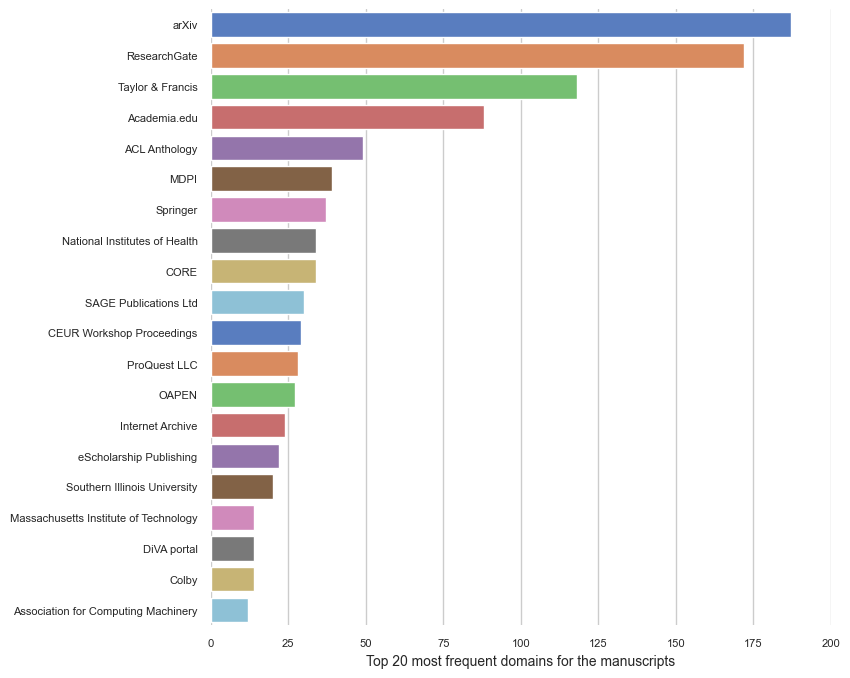

In [23]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
p = sns.barplot(x="counts", y="domain_names", data=most_sources_df,
            label="counts", palette=palette)
ax.set(xlim=(0, 200))
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 most frequent domains for the manuscripts", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)


## Co-authorship network

In [24]:
data['publication_info.summary'].values

array(['Z Waseem, D Hovy - Proceedings of the NAACL student research …, 2016 - aclanthology.org',
       'A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - Conference on Gender …, 2014 - search.proquest.com',
       'D Chatzakou, N Kourtellis, J Blackburn… - Proceedings of the …, 2017 - dl.acm.org',
       ..., 'V Ceia, B Nothwehr, L Wagner - webassets.oxfamamerica.org',
       'S Behan - 2022 - search.proquest.com',
       'C CHUN - 2022 - search.proquest.com'], dtype=object)

In [25]:
data['publication_info.authors']

index
1       [{'name': 'D Hovy', 'link': 'https://scholar.g...
2       [{'name': 'N Yıldırım', 'link': 'https://schol...
3       [{'name': 'D Chatzakou', 'link': 'https://scho...
4       [{'name': 'D Chatzakou', 'link': 'https://scho...
5       [{'name': 'D Warmsley', 'link': 'https://schol...
                              ...                        
4025    [{'name': 'S Roth', 'link': 'https://scholar.g...
4026    [{'name': 'A Thomson', 'link': 'https://schola...
4027    [{'name': 'V Ceia', 'link': 'https://scholar.g...
4028                                                  NaN
4029                                                  NaN
Name: publication_info.authors, Length: 4029, dtype: object

In [26]:
authors = pd.json_normalize(data['publication_info.authors'])
nested_authors1 = pd.json_normalize(authors[0])
nested_authors1['index'] = range(1, len(nested_authors1) + 1)
nested_authors1.columns

#nested_authors1['name'].isna().sum() #1848 
#len(nested_authors1.dropna()) #2181

Index(['name', 'link', 'serpapi_scholar_link', 'author_id', 'index'], dtype='object')

In [27]:
nested_authors1['index'].unique()

array([   1,    2,    3, ..., 4027, 4028, 4029])

In [28]:
nested_authors2 =  pd.json_normalize(authors[1])
nested_authors2['index'] = range(1, len(nested_authors2) + 1)
nested_authors3 = pd.json_normalize(authors[2])
nested_authors3['index'] = range(1, len(nested_authors3) + 1)

# Do a lot of them have second and third authors?
#len(nested_authors3['name'].unique())  #404
#len(nested_authors2['name'].unique()) #923

In [29]:
nested_authors4 = pd.json_normalize(authors[3]) #110
nested_authors4['index'] = range(1, len(nested_authors4) + 1)
nested_authors5 = pd.json_normalize(authors[4]) #15
nested_authors5['index'] = range(1, len(nested_authors5) + 1)
len(nested_authors5['name'].unique()) 

15

##### Building the network

In [30]:
# Getting only the first authors could be interesting
#data = data.merge(nested_authors1,how='left',on='index')
#data['first_authors_id'] = nested_authors1['author_id']
#len(data['first_authors'].unique())
#len(data['author_id'].unique())

#data['author_id']
#data.columns

In [31]:
# Merge the two dataframes

#only run once
data = pd.merge(data, nested_authors1, on="index", how="left")
data = data.rename(columns={"name": "author_name_1", "author_id": "author_id_1"})

In [32]:
data = pd.merge(data, nested_authors2, on="index", how="left")
data = data.rename(columns={"name": "author_name_2", "author_id": "author_id_2"})
data = pd.merge(data, nested_authors3, on="index", how="left").rename(columns={"name": "author_name_3", "author_id": "author_id_3"})
data = pd.merge(data, nested_authors4, on="index", how="left").rename(columns={"name": "author_name_4", "author_id": "author_id_4"})
data = pd.merge(data, nested_authors5, on="index", how="left").rename(columns={"name": "author_name_5", "author_id": "author_id_5"})

#data = pd.merge(data, nested_authors4, on="index", how="left")
#data = pd.merge(data, nested_authors4, on="index", how="left")

In [33]:
# Check to see if the columns are reflected in the dataframe
data.columns

Index(['index', 'position', 'title', 'result_id', 'type', 'link_x', 'snippet',
       'resources', 'publication_info.summary', 'publication_info.authors',
       'inline_links.serpapi_cite_link', 'inline_links.cited_by.total',
       'inline_links.cited_by.link', 'inline_links.cited_by.cites_id',
       'inline_links.cited_by.serpapi_scholar_link',
       'inline_links.related_pages_link',
       'inline_links.serpapi_related_pages_link',
       'inline_links.versions.total', 'inline_links.versions.link',
       'inline_links.versions.cluster_id',
       'inline_links.versions.serpapi_scholar_link',
       'inline_links.cached_page_link', 'inline_links.html_version',
       'extracted_public_inf', 'source_title', 'author_name_1', 'link_y',
       'serpapi_scholar_link_x', 'author_id_1', 'author_name_2', 'link_x',
       'serpapi_scholar_link_y', 'author_id_2', 'author_name_3', 'link_y',
       'serpapi_scholar_link_x', 'author_id_3', 'author_name_4', 'link_x',
       'serpapi_scholar_l

In [34]:
len(data['author_name_1'].unique()) #1963 

1963

In [35]:
# take a subset of the data which has values for the 'author_name_1' column
# only 1st author taken into consideration here because of their name HAS to be there

data_auth = data.dropna(subset=['author_name_1']) # to drop the rows which do not have the names of first authors
data_auth

,index,position,title,result_id,type,link_x,snippet,resources,publication_info.summary,publication_info.authors,...,serpapi_scholar_link_x,author_id_3,author_name_4,link_x,serpapi_scholar_link_y,author_id_4,author_name_5,link_y,serpapi_scholar_link,author_id_5
0,1,0,Hateful symbols or hateful people? predictive ...,eG51Yln4CGsJ,Pdf,https://aclanthology.org/N16-2013.pdf,"… , NLP research on hate speech has been very ...","[{'title': 'aclanthology.org', 'file_format': ...","Z Waseem, D Hovy - Proceedings of the NAACL st...","[{'name': 'D Hovy', 'link': 'https://scholar.g...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,The Bullying Game: Sexism Based Toxic Language...,m6JOssuaA8UJ,NaN,https://search.proquest.com/openview/7e6d1aa29...,"… Based on this classification method, the mac...",NaN,"A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - C...","[{'name': 'N Yıldırım', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,Mean birds: Detecting aggression and bullying ...,nmwGhySbXz4J,NaN,https://dl.acm.org/doi/abs/10.1145/3091478.309...,… [36] perform hate speech detection on Yahoo ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,https://serpapi.com/search.json?author_id=W_Ap...,W_ApnIUAAAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3,Hate is not binary: Studying abusive behavior ...,T3zAicbzZDkJ,NaN,https://dl.acm.org/doi/abs/10.1145/3078714.307...,… We perform an unsupervised machine learning ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,https://serpapi.com/search.json?author_id=W_Ap...,W_ApnIUAAAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4,"On the Detection of Hate Speech, Hate Speakers...",qKtEpwXk55wJ,NaN,https://search.proquest.com/openview/395ac461a...,… of machine learning algorithms in understand...,"[{'title': 'cornell.edu', 'file_format': 'PDF'...",D Warmsley - 2017 - search.proquest.com,"[{'name': 'D Warmsley', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,4018,7,Afrofuturism and Digital Humanities: Show Me a...,YE8tuU2-H3QJ,Book,https://books.google.com/books?hl=en&lr=&id=PT...,"… trademarks, and are used only for identifica...",NaN,BW Carter - 2022 - books.google.com,"[{'name': 'BW Carter', 'link': 'https://schola...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4023,4024,13,Sex Work on Campus,Ojsakiqg2B8J,Book,https://library.oapen.org/handle/20.500.12657/...,… for identification and explanation without i...,"[{'title': 'oapen.org', 'file_format': 'PDF', ...",TJ Stewart - 2022 - library.oapen.org,"[{'name': 'TJ Stewart', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4024,4025,14,Peer Support IDD Scoping Review Search,vHK6O-kNJ9EJ,NaN,https://scholarshare.temple.edu/handle/20.500....,To identify studies to include or consider for...,"[{'title': 'temple.edu', 'file_format': 'HTML'...","S Roth, B Pfeiffer, KE Weiss, S Aleong, L Karp...","[{'name': 'S Roth', 'link': 'https://scholar.g...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4025,4026,15,Annual Atwood Bibliography 2020,vYGhoPED_4MJ,NaN,https://search.proquest.com/openview/60ee4d628...,"Since 2016, there has also been a change in ed...",NaN,"A Thomson, S Ganz - Margaret Atwood Studies, 2...","[{'name': 'A Thomson', 'link': 'https://schola...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data_auth['author_name_1'].isnull().sum() #0
data_auth['author_id_1'].isnull().sum() #0
data_auth['author_id_1'].dtype #dtype('O')
# But we need unique numerical values

#Use label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_auth['name_num_1'] = le.fit_transform(data_auth['author_name_1'])
len(data_auth['name_num_1'].unique()) # 1962 = same as number of unique number of authors

1962

In [37]:
#Similarly for the other ones

data_auth['name_num_2'] = le.fit_transform(data_auth['author_name_2'])
data_auth['name_num_3'] = le.fit_transform(data_auth['author_name_3'])
data_auth['name_num_4'] = le.fit_transform(data_auth['author_name_4'])
data_auth['name_num_5'] = le.fit_transform(data_auth['author_name_5'])

In [38]:
# combining all authors

data_auth['all_authors'] = data_auth[['author_name_1', 'author_name_2', 
                                      'author_name_3', 'author_name_4',
                                     'author_name_5']].fillna('').agg(', '.join, axis=1)

def prepros_auth(text):
    text = text.rstrip(', ') # to remove the trailing commas
    return text

data_auth['all_authors'] = data_auth['all_authors'].apply(prepros_auth)

data_auth['all_authors']

0                                       D Hovy
1                           N Yıldırım, İ Ajas
2       D Chatzakou, N Kourtellis, J Blackburn
3       D Chatzakou, N Kourtellis, J Blackburn
4                                   D Warmsley
                         ...                  
4017                                 BW Carter
4023                                TJ Stewart
4024                        S Roth, B Pfeiffer
4025                                 A Thomson
4026                                    V Ceia
Name: all_authors, Length: 2181, dtype: object

In [39]:
from itertools import combinations
from nltk import skipgrams

def auth_comb(string):
    words= string.split(", ")
    pairs = list(skipgrams(words, n=2, k=len(words)-1))
    return pairs

data_auth['paired_authors'] = data_auth['all_authors'].apply(auth_comb)
#excludes single authors from the list
# as only concerned with multiple pairs

data_auth['paired_authors']

0                                                      []
1                                  [(N Yıldırım, İ Ajas)]
2       [(D Chatzakou, N Kourtellis), (D Chatzakou, J ...
3       [(D Chatzakou, N Kourtellis), (D Chatzakou, J ...
4                                                      []
                              ...                        
4017                                                   []
4023                                                   []
4024                               [(S Roth, B Pfeiffer)]
4025                                                   []
4026                                                   []
Name: paired_authors, Length: 2181, dtype: object

In [40]:
# only keeping the rows with NO empty lists

data_paired_auth = data_auth[data_auth['paired_authors'].map(lambda d: len(d)) > 0]
#data_paired_auth

In [41]:
auth_term_bigram= data_paired_auth['paired_authors']
#auth_bigrams = list(itertools.chain(*auth_term_bigram))
auth_bigrams = list(chain.from_iterable(auth_term_bigram))

# Create counter of words in clean bigrams
auth_bigram_counts = collections.Counter(auth_bigrams)

auth_bigram_counts= auth_bigram_counts.most_common(150)
auth_bigram_counts

[(('V Basile', 'V Patti'), 6),
 (('V Basile', 'C Bosco'), 5),
 (('V Patti', 'P Rosso'), 4),
 (('P Mishra', 'H Yannakoudakis'), 4),
 (('A Flynn', 'A Powell'), 4),
 (('D Chatzakou', 'N Kourtellis'), 3),
 (('D Chatzakou', 'J Blackburn'), 3),
 (('T De Smedt', 'S Jaki'), 3),
 (('Z Zhang', 'F Hopfgartner'), 3),
 (('JA Tucker', 'A Guess'), 3),
 (('A Htait', 'L Azzopardi'), 3),
 (('P Patwa', 'A Das'), 3),
 (('D Nozza', 'D Hovy'), 3),
 (('N Kourtellis', 'J Blackburn'), 2),
 (('T Veale', 'E Shutova'), 2),
 (('TR Glynn', 'KE Gamarel'), 2),
 (('TR Glynn', 'CW Kahler'), 2),
 (('KE Gamarel', 'CW Kahler'), 2),
 (('DP Barash', 'CP Webel'), 2),
 (('GK Pitsilis', 'H Ramampiaro'), 2),
 (('GK Pitsilis', 'H Langseth'), 2),
 (('H Ramampiaro', 'H Langseth'), 2),
 (('T Lynn', 'P Rosati'), 2),
 (('T Caselli', 'N Novielli'), 2),
 (('T Caselli', 'V Patti'), 2),
 (('T Caselli', 'P Rosso'), 2),
 (('N Novielli', 'V Patti'), 2),
 (('N Novielli', 'P Rosso'), 2),
 (('P Mishra', 'E Shutova'), 2),
 (('H Yannakoudakis', 

In [42]:
auth_bigram_counts[0]

(('V Basile', 'V Patti'), 6)

In [43]:
type(auth_bigram_counts)

list

In [44]:
#data_paired_auth = pd.DataFrame.from_dict(auth_bigram_counts, orient='index').reset_index()
data_paired_auth = pd.DataFrame(auth_bigram_counts,
                             columns=['auth_bigram', 'count'])

#data_paired_auth = data_paired_auth.rename(columns={'index':'auth_bigram', 0:'count'})
data_paired_auth

,auth_bigram,count
0,"(V Basile, V Patti)",6
1,"(V Basile, C Bosco)",5
2,"(V Patti, P Rosso)",4
3,"(P Mishra, H Yannakoudakis)",4
4,"(A Flynn, A Powell)",4
...,...,...
145,"(KF Steinmetz, MR Nobles)",1
146,"(J Jetten, A Iyer)",1
147,"(J Jetten, NR Branscombe)",1
148,"(A Iyer, NR Branscombe)",1


In [45]:
# Create dictionary of bigrams and their counts
d = data_paired_auth.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)

In [46]:
color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

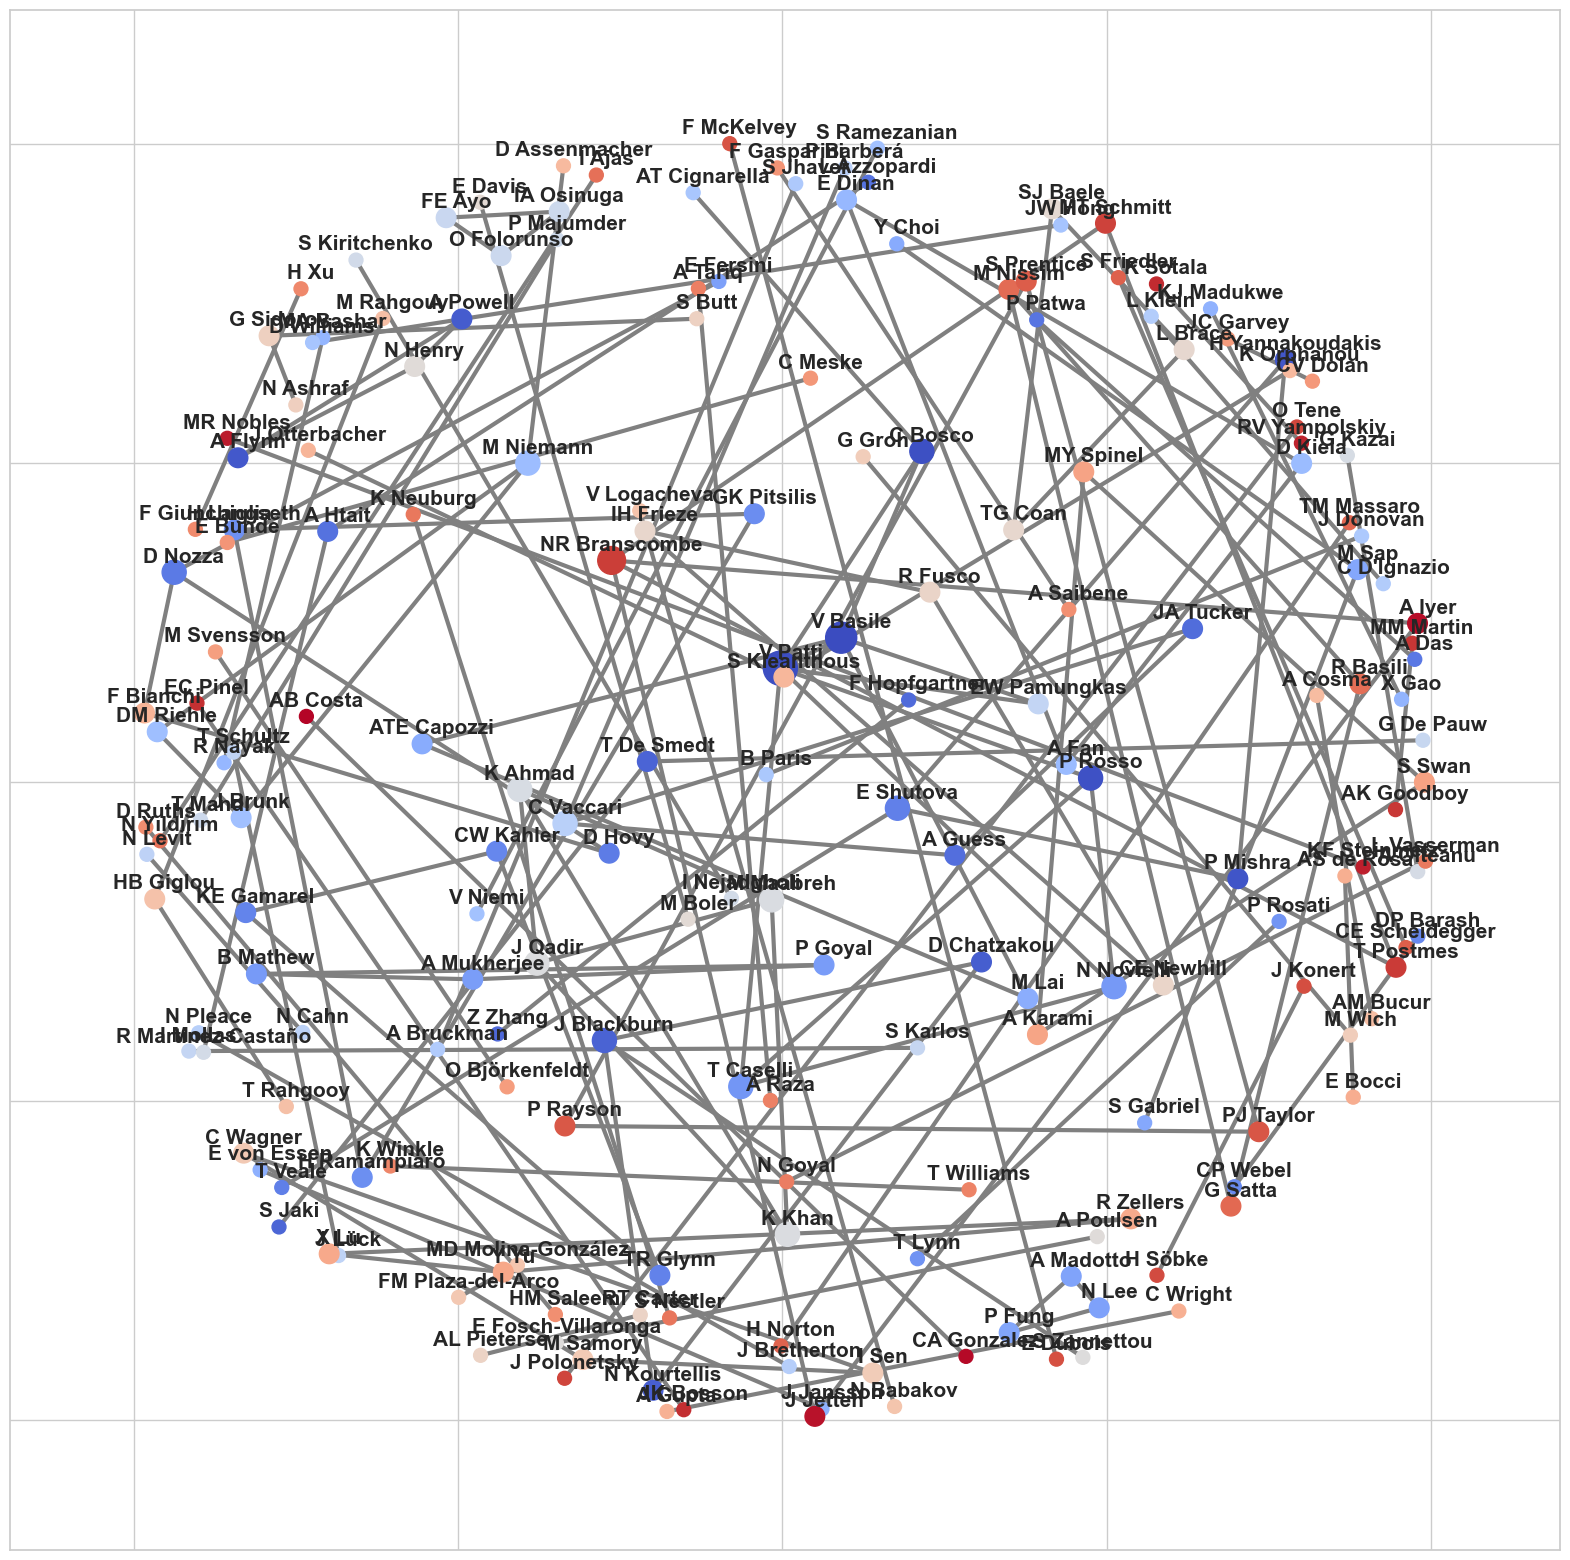

In [47]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=3,
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

#plt.savefig('authors_co-occurrence.png')
plt.show()


## Finding the most frequent co-occurence of keywords

In [48]:
'''
def preprocess_text(text):
    spell = Speller(lang='en') #check spellings 
    text = spell(text) # does not seem to work well on this. Works better on individual sentences
    tokens = nltk.word_tokenize(text) #tokenize
    text = [w for w in tokens if w.isalpha()]  
    stops = set(stopwords.words("english")) #eliminate stopwords
    text = [word for word in text if not word in stops]
    stemmer = PorterStemmer() #stemming
    text = [stemmer.stem(word) for word in text]
    return ( " ".join(text)) #rejoin the words
'''


def remove_uns(text):
    text = str(text)
    #text = text.capitalize()
    text= text.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    text= re.sub(r'http\S+', '',cleantext)
    text = re.sub('[0-9]+', '', text)
    text = text.capitalize()
    tokens = nltk.word_tokenize(text) #tokenize
    text = [w for w in tokens if w.isalpha()]  
    stops = set(stopwords.words("english")) #eliminate stopwords
    text = [word for word in text if not word in stops]
    return ( " ".join(text)) #rejoin the words

data['snippet'] = data.apply(lambda x: remove_uns(x['snippet']), axis=1)

data['snippet'].iloc[110]

'fighting charges sexism sexism yet slavery identify abusive behaviors domains nonetheless shall see next developers'

In [49]:
# Combining the topics and abstracts
data['title & snippet'] = data['title'] + '. ' + data['snippet'] + '.'

In [50]:
from keybert import KeyBERT

kw_model = KeyBERT(model='all-mpnet-base-v2')

def extraction(text):
    keywords = kw_model.extract_keywords(text, 
                                     keyphrase_ngram_range=(1, 2), #since prefer coupled pai of words 
                                     stop_words='english', 
                                     highlight=False,
                                     top_n=5)
    listed_keys= []
    for i in keywords:
        listed_keys.append(str(i[0]))
    return listed_keys

data['keywords'] = data['title & snippet'].apply(extraction)


#keywords_list= list(dict(keywords).keys()) 

#print(keywords_list)

In [51]:
data['keywords'].head(10)

0    [hate speech, hateful symbols, symbols hateful...
1    [toxic language, bullying game, game sexism, c...
2    [bullying twitter, detecting aggression, aggre...
3    [sexism online, gamergate twitter, gamergate, ...
4    [detecting hate, speech hate, hate speech, rac...
5    [taboo expressions, vulgar, taboo, offensive s...
6    [cyberbullying twitter, detection cyberbullyin...
7    [identification cyberbullying, cyberbullying c...
8    [ai, offensive speech, artificial intelligence...
9    [ambivalent sexism, sexism moral, sexism, foun...
Name: keywords, dtype: object

#### Co-occurence analysis

In [52]:
#maybe this step can be omited, as bigrams are not required
#having keywords itself is fine
'''
def bigram_sequence(text_lst):
    result = [a for ls in text_lst for a in zip(ls.split(" ")[:-1], ls.split(" ")[1:])]
    return result

data['bigram_keywords'] = data['keywords'].apply(bigram_sequence)

'''

'\ndef bigram_sequence(text_lst):\n    result = [a for ls in text_lst for a in zip(ls.split(" ")[:-1], ls.split(" ")[1:])]\n    return result\n\ndata[\'bigram_keywords\'] = data[\'keywords\'].apply(bigram_sequence)\n\n'

In [53]:
#from collections import defaultdict

# Remove collection words
collection_words = ['ai', 'artificial intelligence', 'natural language', 'natural language processing', 'language processing',
                   'nlp', 'machine learning', 'learning', 'deep learning', 'artificial intelligence', 
                    'artificial intelligence ai', 'ai intelligence', 'intelligence ai', 'intelligence'
                   'ml', 'dl', 'ellen wachtel', 'driven recommendation', 'facebook ai']

def remove_words(list_):
    temp_list = []
    intersect = set(list_).intersection(collection_words)
    for i in list_:
        if i in intersect:
            continue
        else:
            temp_list.append(i)
    return temp_list
    
def coupling_terms(list_):
    res= [(j,i) for i in list_ for j in list_ if j not in i 
       if set(j.split('_')[1:]) < set(i.split('_'))][::2]
    return res

data['coupled_keywords'] = data['keywords'].apply(remove_words)
data['coupled_keywords'] = data['coupled_keywords'].apply(coupling_terms)
data['coupled_keywords']

0       [(hateful symbols, hate speech), (twitter nlp,...
1       [(bullying game, toxic language), (chat logs, ...
2       [(detecting aggression, bullying twitter), (ha...
3       [(gamergate twitter, sexism online), (behavior...
4       [(speech hate, detecting hate), (racism hate, ...
                              ...                        
4024    [(identify studies, systematic review), (medic...
4025    [(bibliography 2020, atwood bibliography), (ab...
4026    [(teoría feminista, feminista como), (tendenci...
4027    [(transcribed interviews, female superintenden...
4028    [(suffering reconciliation, narratives sufferi...
Name: coupled_keywords, Length: 4029, dtype: object

In [54]:
# Flatten list of bigrams in clean texts

terms_b= data['coupled_keywords'] 
bigrams = list(chain.from_iterable(terms_b)) #list(itertools.chain(*terms_b))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(100)

[(('online hate', 'hate speech'), 22),
 (('hate speech', 'hate'), 20),
 (('hate speech', 'online hate'), 13),
 (('racism sexism', 'racism'), 12),
 (('trademarks used', 'trademarks'), 12),
 (('hate speech', 'racism sexism'), 12),
 (('misogyny identification', 'automatic misogyny'), 12),
 (('abusive language', 'abusive'), 12),
 (('hate speech', 'abusive language'), 10),
 (('systemic theory', 'family therapy'), 10),
 (('names trademarks', 'trademarks'), 9),
 (('cyberbullying detection', 'cyberbullying'), 9),
 (('racism sexism', 'hate speech'), 9),
 (('misogyny detection', 'hate speech'), 9),
 (('detecting hate', 'hate speech'), 8),
 (('trademarks used', 'names trademarks'), 8),
 (('automatic misogyny', 'misogyny identification'), 8),
 (('names trademarks', 'trademarks used'), 7),
 (('abusive language', 'hate speech'), 7),
 (('offensive language', 'hate speech'), 7),
 (('hate speech', 'misogyny detection'), 7),
 (('hate speech', 'speech hate'), 6),
 (('hate speech', 'misogyny identificatio

In [55]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(online hate, hate speech)",22
1,"(hate speech, hate)",20
2,"(hate speech, online hate)",13
3,"(racism sexism, racism)",12
4,"(trademarks used, trademarks)",12
...,...,...
95,"(interactive therapy, contemporary psychology)",3
96,"(therapy books, systemic theory)",3
97,"(systemic theory, therapy books)",3
98,"(sexism detection, sexism)",3


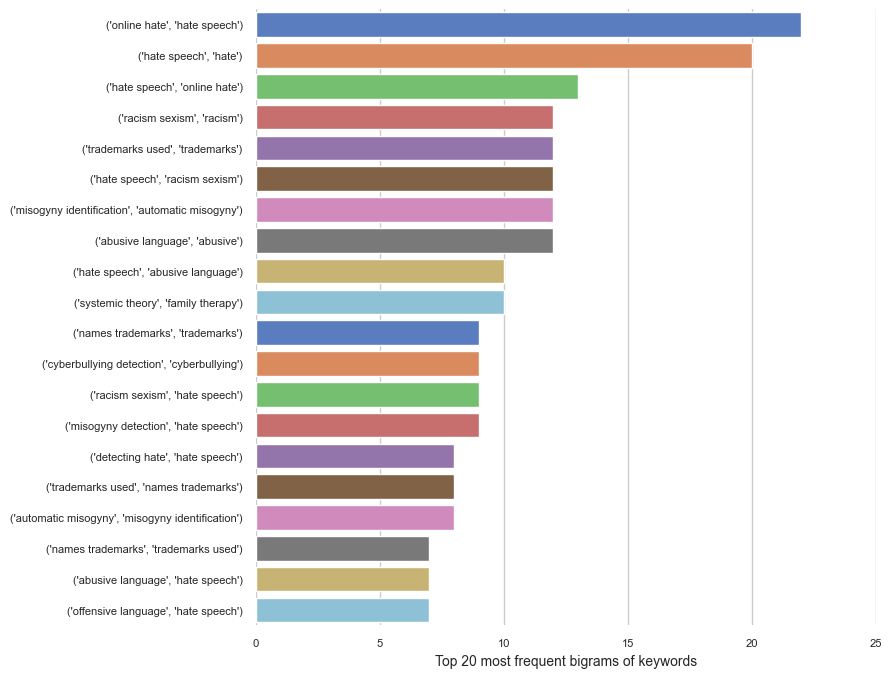

In [60]:
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
top_20_bigram = bigram_df[:20]
p = sns.barplot(x="count", y="bigram", data=top_20_bigram,
            label="count", palette=palette)
ax.set(xlim=(0, 25))
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 most frequent bigrams of keywords", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)


In [61]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    degree = dict(G.degree)

G.add_node("sexism", weight=100)

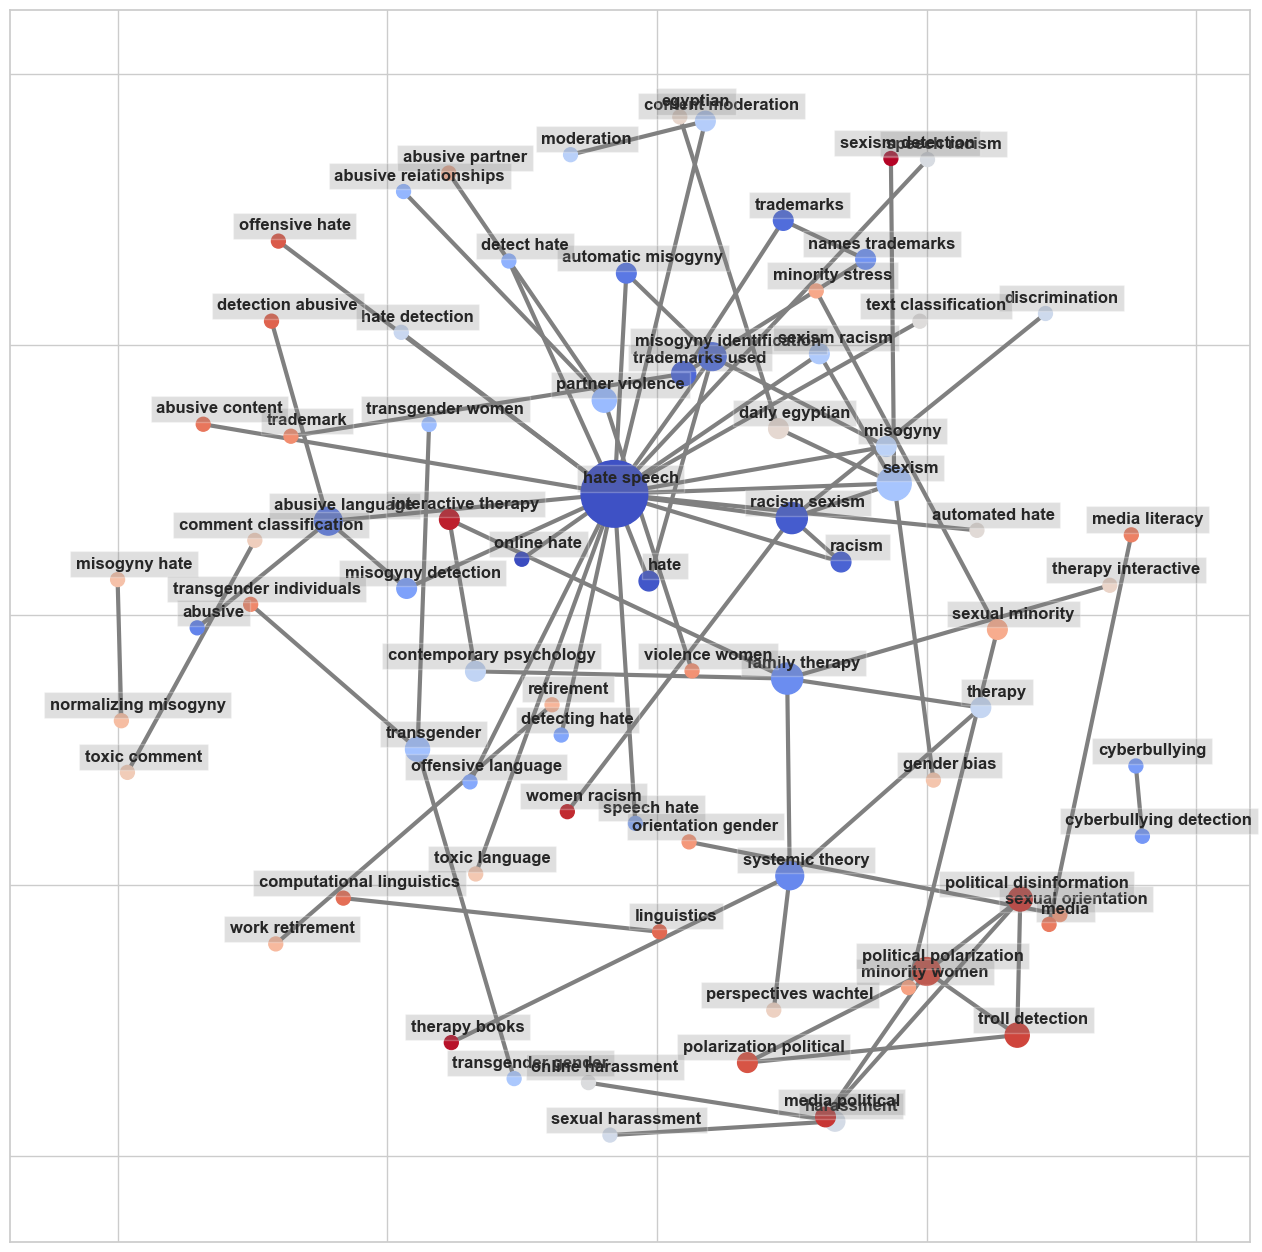

In [62]:
color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(16, 16))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.03, value[1]+.02
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=12, weight='bold')
    
#plt.savefig('sexism_co-occurrence.png')
plt.show()

## Authors who researched specifically on sexism and/or misogyny

In [63]:
# subsetting to documents with both substrings in the text
# And also, from the data where the name of the first authors are present
data_auth['title & snippet'] = data_auth['title'] + '. ' + data_auth['snippet'] + '.'
sexism_docs = data_auth[data_auth['title & snippet'].str.contains("sexism", "misogyny")]
sexism_docs

,index,position,title,result_id,type,link_x,snippet,resources,publication_info.summary,publication_info.authors,...,serpapi_scholar_link,author_id_5,name_num_1,name_num_2,name_num_3,name_num_4,name_num_5,all_authors,paired_authors,title & snippet
0,1,0,Hateful symbols or hateful people? predictive ...,eG51Yln4CGsJ,Pdf,https://aclanthology.org/N16-2013.pdf,"… , NLP research on hate speech has been very ...","[{'title': 'aclanthology.org', 'file_format': ...","Z Waseem, D Hovy - Proceedings of the NAACL st...","[{'name': 'D Hovy', 'link': 'https://scholar.g...",...,NaN,NaN,421,922,403,109,14,D Hovy,[],Hateful symbols or hateful people? predictive ...
2,3,2,Mean birds: Detecting aggression and bullying ...,nmwGhySbXz4J,NaN,https://dl.acm.org/doi/abs/10.1145/3091478.309...,… [36] perform hate speech detection on Yahoo ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,NaN,NaN,399,633,174,109,14,"D Chatzakou, N Kourtellis, J Blackburn","[(D Chatzakou, N Kourtellis), (D Chatzakou, J ...",Mean birds: Detecting aggression and bullying ...
3,4,3,Hate is not binary: Studying abusive behavior ...,T3zAicbzZDkJ,NaN,https://dl.acm.org/doi/abs/10.1145/3078714.307...,… We perform an unsupervised machine learning ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,NaN,NaN,399,633,174,109,14,"D Chatzakou, N Kourtellis, J Blackburn","[(D Chatzakou, N Kourtellis), (D Chatzakou, J ...",Hate is not binary: Studying abusive behavior ...
4,5,4,"On the Detection of Hate Speech, Hate Speakers...",qKtEpwXk55wJ,NaN,https://search.proquest.com/openview/395ac461a...,… of machine learning algorithms in understand...,"[{'title': 'cornell.edu', 'file_format': 'PDF'...",D Warmsley - 2017 - search.proquest.com,"[{'name': 'D Warmsley', 'link': 'https://schol...",...,NaN,NaN,455,922,403,109,14,D Warmsley,[],"On the Detection of Hate Speech, Hate Speakers..."
5,6,5,"CLiC-it 2017 11-12 December 2017, Rome",mgGW_P5epfcJ,Pdf,https://www.iris.unisa.it/bitstream/11386/4717...,… annotation and classification of vulgar ad o...,"[{'title': 'unisa.it', 'file_format': 'PDF', '...","R Basili, M Nissim, G Satta - 2017 - iris.unis...","[{'name': 'R Basili', 'link': 'https://scholar...",...,NaN,NaN,1488,561,142,109,14,"R Basili, M Nissim, G Satta","[(R Basili, M Nissim), (R Basili, G Satta), (M...","CLiC-it 2017 11-12 December 2017, Rome. … anno..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,3958,7,"9. Racism at work: a conspectus–approaches, pe...",_vZHqCeoi8IJ,NaN,https://books.google.com/books?hl=en&lr=&id=cq...,… as emotionally damaging and offensive mechan...,NaN,"L Chernyak-Hai, A Tziner - … the World of Work...","[{'name': 'L Chernyak-Hai', 'link': 'https://s...",...,NaN,NaN,1027,53,403,109,14,"L Chernyak-Hai, A Tziner","[(L Chernyak-Hai, A Tziner)]","9. Racism at work: a conspectus–approaches, pe..."
3969,3970,19,1. Introduction: Chineseness in Chile,X79zPXfJ6goJ,NaN,https://link.springer.com/chapter/10.1007/978-...,… sexism inherent in its comic content. Over t...,NaN,"M Montt Strabucchi, C Chan, ME Ríos - Chinesen...","[{'name': 'M Montt Strabucchi', 'link': 'https...",...,NaN,NaN,1187,107,403,109,14,"M Montt Strabucchi, C Chan","[(M Montt Strabucchi, C Chan)]",1. Introduction: Chineseness in Chile. … sexis...
3981,3982,11,Networking the Black Church: Digital Black Chr...,6fIDwbZEhF8J,Book,https://books.google.com/books?hl=en&lr=&id=iq...,"… currents regarding patriarchy, sexism, and s...",NaN,ED Gault - 2022 - books.google.com,"[{'name': 'ED Gault', 'link': 'https://scholar...",...,NaN,NaN,562,922,403,109,14,ED Gault,[],Networking the Black Church: Digital Black Chr...
3985,3986,15,Video Game Art Reader: Volume 4,rqSKR42SN5cJ,NaN,https://library.oapen.org/handle/20.500.12657/...,… industry has nor

In [64]:
sexism_docs['author_id_1']

0       7xluaTAAAAAJ
2       j9LszmkAAAAJ
3       j9LszmkAAAAJ
4       S8dU8BoAAAAJ
5       U1A22fYAAAAJ
            ...     
3957    zU6mULkAAAAJ
3969    yqBVxFsAAAAJ
3981    Y34TFUEAAAAJ
3985    ewh7LrcAAAAJ
4023    Im5nBykAAAAJ
Name: author_id_1, Length: 786, dtype: object

In [65]:
sexism_docs['author_name_1'].unique()

array(['D Hovy', 'D Chatzakou', 'D Warmsley', 'R Basili', 'ML Vecina',
       'L Wolfer', 'J Reagle', 'S Friedler', 'D Acquadro Maran', 'BL Ott',
       'S Deer', 'T Veale', 'SE Valentine', 'TR Glynn', 'MT Schmitt',
       'M Mansouri', 'S Mukkamala', 'R Polman', 'AA Samek', 'K Sotala',
       'GL Lee', 'CA Franklin', 'EO McGee', 'MB Babac', 'AI Vines',
       'L Gerassi', 'H Zaykowski', 'C Andoniou', 'MW Skirpan',
       'ME Sweeney', "BM O'Handley", 'JA Roffee', 'T Sandercock',
       'KG Spencer', 'JE Helms', 'S de Lemus', 'MJ Eliason', 'D Schrock',
       'JA Puckett', 'T Sangaramoorthy', 'M Higgins', 'N Rumens',
       'TKM Bailey', 'J Crossman', 'D Bandelli', 'AS Johnson Lachuk',
       'L Drabble', 'NA Nnawulezi', 'DC Dennett', 'KL Spencer',
       'AP DePrince', 'P Gottschalk', 'JM Chonody', 'MA Morrison',
       'L Wilson', 'R Sparrow', 'MA MacLeod', 'E Ramirez', 'IA Kira',
       'A Kulick', 'K Greenland', 'G Campani', 'AV Kleinherenbrink',
       'G Wong-Padoongpatt', 'TJ Yo

In [66]:
author_terms = list(chain.from_iterable([sexism_docs['author_name_1'], sexism_docs['author_name_2'].dropna(),
                                        sexism_docs['author_name_3'].dropna(), sexism_docs['author_name_4'].dropna(),
                                        sexism_docs['author_name_5'].dropna()])) #dropna() for first author need not be used

# Create counter of words in clean bigrams
auth_counts = collections.Counter(author_terms)

auth_counts.most_common(50)

[('P Mishra', 4),
 ('S Mishra', 4),
 ('E Shutova', 4),
 ('H Yannakoudakis', 4),
 ('D Chatzakou', 3),
 ('V Basile', 3),
 ('T De Smedt', 3),
 ('WHK Chun', 3),
 ('S Kiritchenko', 3),
 ('Y Gerrard', 3),
 ('HM Saleem', 3),
 ('Y Li', 3),
 ('T Williams', 3),
 ('N Kourtellis', 3),
 ('JL Megías', 3),
 ('P Fung', 3),
 ('D Hovy', 2),
 ('T Veale', 2),
 ('TR Glynn', 2),
 ('AA Samek', 2),
 ('CA Franklin', 2),
 ('L Gerassi', 2),
 ('MJ Eliason', 2),
 ('MA Morrison', 2),
 ('R Sparrow', 2),
 ('DP Barash', 2),
 ('J Banks', 2),
 ('RA Bartle', 2),
 ('J Anderson', 2),
 ('P Blessinger', 2),
 ('DE Gray', 2),
 ('M Sap', 2),
 ('JH Park', 2),
 ('KJ Madukwe', 2),
 ('E Dinan', 2),
 ('M Niemann', 2),
 ('J Brunk', 2),
 ('P Srinivasan', 2),
 ('JW Hong', 2),
 ('M Strait', 2),
 ('M Hardey', 2),
 ("C D'Ignazio", 2),
 ('PP Lui', 2),
 ('SJ Bobbili', 2),
 ('J Bretherton', 2),
 ('KL Blair', 2),
 ('J Lück', 2),
 ('FE Ayo', 2),
 ('O Papakyriakopoulos', 2),
 ('R Kuo', 2)]

In [67]:
authors_df = pd.DataFrame(auth_counts.most_common(35),
                             columns=['Authors', 'count'])
authors_df.head()

,Authors,count
0,P Mishra,4
1,S Mishra,4
2,E Shutova,4
3,H Yannakoudakis,4
4,D Chatzakou,3


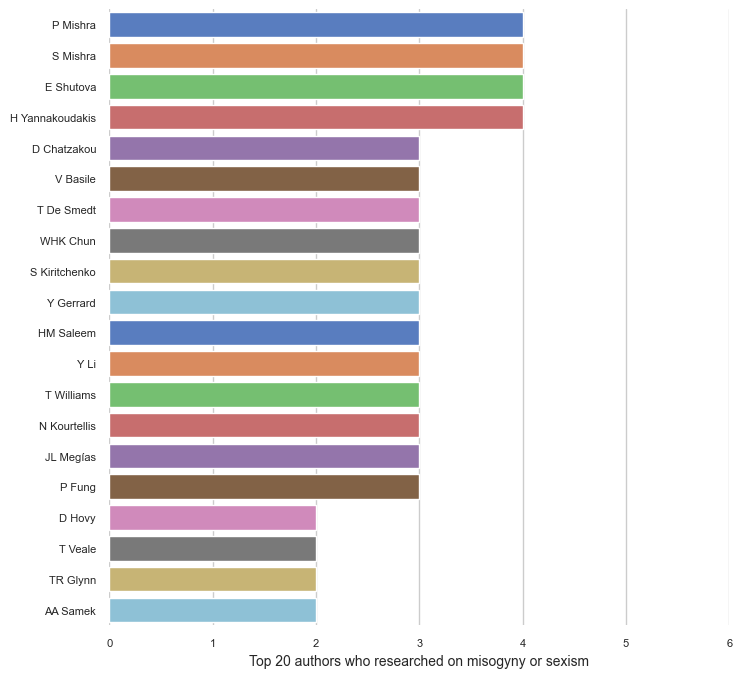

In [72]:
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
top_20_authors = authors_df[:20]
p = sns.barplot(x="count", y="Authors", data=top_20_authors,
            label="count", palette=palette)
ax.set(xlim=(0, 6))
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 authors who researched on misogyny or sexism", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)

### Platforms of interest

In [73]:
social_media_lst = ["twitter", "facebook", "reddit", "instagram", "whatsapp",
                    "gab", "2chan", "4chan", "8chan", "youtube", "linkedin", "tumblr"]

pattern = '|'.join(r"\b{}\b".format(x) for x in social_media_lst)
data['platforms'] = data['title & snippet'].str.findall(pattern, flags=re.I).str.join(' ')
data['platforms'].unique()

array(['twitter', '', 'Twitter', 'Facebook', 'Twitter twitter',
       'facebook', 'youtube', 'YouTube', 'facebook twitter',
       'twitter twitter', 'gab', 'reddit', 'Facebook facebook',
       'Twitter Facebook', '4chan 8chan', 'TWITTER', '4chan',
       'Twitter Reddit 4chan', 'Gab', 'Twitter Twitter', 'instagram',
       'Facebook facebook instagram', '8chan', 'Reddit',
       'Facebook Twitter', 'YouTube youtube', 'FACEBOOK facebook',
       'Reddit reddit', 'Gab gab', 'youtube twitter twitter',
       'Facebook twitter', 'linkedin twitter facebook instagram',
       'Instagram', 'youtube twitter', 'facebook facebook'], dtype=object)

In [95]:
# taking in only the platforms which showed in the string extraction
twitter_count = data['platforms'].str.lower().str.contains('twitter').sum()
fb_count = data['platforms'].str.lower().str.contains('facebook').sum()
fourchan_count = data['platforms'].str.lower().str.contains('4chan').sum()
eightchan_count = data['platforms'].str.lower().str.contains('8chan').sum()
youtube_count = data['platforms'].str.lower().str.contains('youtube').sum()
gab_count = data['platforms'].str.lower().str.contains('gab').sum()
instagram_count = data['platforms'].str.lower().str.contains('instagram').sum()
reddit_count = data['platforms'].str.lower().str.contains('reddit').sum()
linkedin_count = data['platforms'].str.lower().str.contains('linkedin').sum()


df_social_media_counts = pd.DataFrame({'Social Media Platforms': ['Twitter', 'Facebook', '4chan', '8chan',
                                                                 'YouTube', 'Gab', 'Instagram', 'Reddit', 'LinkedIn'], 
                                       'Counts': [twitter_count, fb_count, fourchan_count, eightchan_count,
                                                 youtube_count, gab_count, instagram_count, reddit_count, linkedin_count]}).sort_values(by='Counts', ascending=False)

In [96]:
# Plotly graph

fig = px.bar(df_social_media_counts, x='Counts', y='Social Media Platforms', text='Counts', color='Social Media Platforms')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)

fig.show()

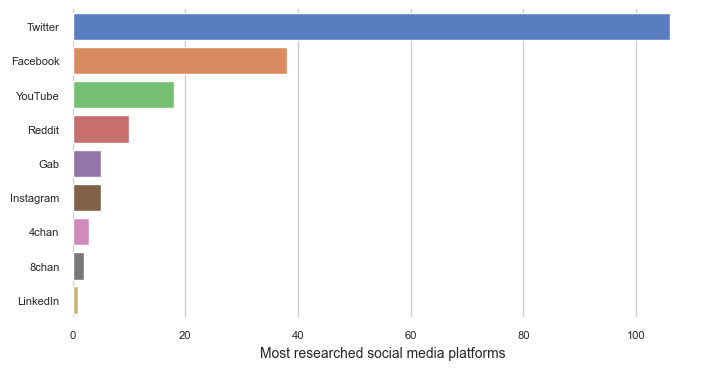

In [102]:
f, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("muted")
order_list = df_social_media_counts['Social Media Platforms'].to_list()
p = sns.barplot(data=df_social_media_counts, x='Counts', y='Social Media Platforms', palette=palette, order=order_list)
ax.set(xlim=(0, 110))
sns.despine(left=True, bottom=True)
p.set_xlabel("Most researched social media platforms", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)

## Topic Modeling

#### Sentence only

In [135]:
#https://www.kdnuggets.com/2020/11/topic-modeling-bert.html
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

data1 = data['title & snippet']

#train_df.loc[pd.isnull(train_df.selected_text),:]

embeddings = model.encode(data1, show_progress_bar=True)

Batches:   0%|          | 0/126 [00:00<?, ?it/s]

In [136]:
len(data['title & snippet'].dropna().unique())

4017

In [137]:
embeddings.shape 

(4029, 768)

In [138]:
len(data1)

4029

In [180]:
umap_data_1 = umap.UMAP(n_neighbors=200, n_components=5, min_dist=0.2, metric='cosine').fit_transform(embeddings)
umap_data_1.shape

(4029, 5)

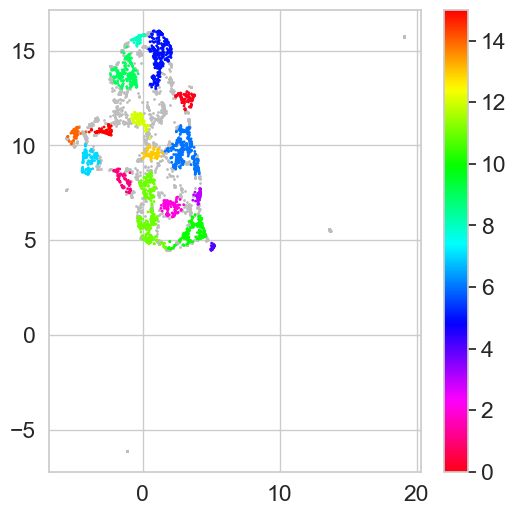

In [181]:
# Prepare data
umap_data_2 = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.0, metric='cosine').fit_transform(umap_data_1)

cluster = hdbscan.HDBSCAN(min_cluster_size=50,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_data_2)

result = pd.DataFrame(umap_data_2, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(6, 6))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='hsv_r')
plt.colorbar()

In [182]:
len(result.labels.unique())
#not a good clusters
# almost all of them are labeled as outliers even with minimum number of neighbours
# there are a few outliers which are very far from the cluster
# proves that limited amount of abstract is not enough to deduce topics
# more so, when paired with title, as the titles are often more creative

17

In [184]:
#cluster.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
result.labels

0        5
1       -1
2        5
3        5
4        5
        ..
4024     7
4025     7
4026    -1
4027    10
4028     6
Name: labels, Length: 4029, dtype: int64

In [187]:
result[result.labels==7] #see for one label

,x,y,labels
137,-4.328326,9.424632,7
206,-3.664341,8.763224,7
297,-3.823219,9.028127,7
302,-3.978244,8.812380,7
314,-3.457834,9.451980,7
...,...,...,...
4007,-4.188353,9.517260,7
4012,-3.675193,9.648418,7
4020,-4.067271,8.518030,7
4024,-3.960980,8.673608,7


##### Applying the class-based TF-IDF

In [188]:
docs_df = pd.DataFrame(data)
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
#docs_per_topic = docs_df.groupby(['Topic'], as_index = False)
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'title & snippet': ' '.join})
docs_df

,index,position,title,result_id,type,link_x,snippet,resources,publication_info.summary,publication_info.authors,...,author_name_5,link_y,serpapi_scholar_link,author_id_5,title & snippet,keywords,coupled_keywords,platforms,Topic,Doc_ID
0,1,0,Hateful symbols or hateful people? predictive ...,eG51Yln4CGsJ,Pdf,https://aclanthology.org/N16-2013.pdf,nlp research hate speech limited primarily due...,"[{'title': 'aclanthology.org', 'file_format': ...","Z Waseem, D Hovy - Proceedings of the NAACL st...","[{'name': 'D Hovy', 'link': 'https://scholar.g...",...,NaN,NaN,NaN,NaN,Hateful symbols or hateful people? predictive ...,"[hate speech, hateful symbols, symbols hateful...","[(hateful symbols, hate speech), (twitter nlp,...",twitter,5,0
1,2,1,The Bullying Game: Sexism Based Toxic Language...,m6JOssuaA8UJ,NaN,https://search.proquest.com/openview/7e6d1aa29...,based classification method model examines dat...,NaN,"A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - C...","[{'name': 'N Yıldırım', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,The Bullying Game: Sexism Based Toxic Language...,"[toxic language, bullying game, game sexism, c...","[(bullying game, toxic language), (chat logs, ...",,-1,1
2,3,2,Mean birds: Detecting aggression and bullying ...,nmwGhySbXz4J,NaN,https://dl.acm.org/doi/abs/10.1145/3091478.309...,perform hate speech detection yahoo finance po...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,NaN,NaN,NaN,NaN,Mean birds: Detecting aggression and bullying ...,"[bullying twitter, detecting aggression, aggre...","[(detecting aggression, bullying twitter), (ha...",twitter,5,2
3,4,3,Hate is not binary: Studying abusive behavior ...,T3zAicbzZDkJ,NaN,https://dl.acm.org/doi/abs/10.1145/3078714.307...,perform unsupervised machine learning analysis...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,NaN,NaN,NaN,NaN,Hate is not binary: Studying abusive behavior ...,"[sexism online, gamergate twitter, gamergate, ...","[(gamergate twitter, sexism online), (behavior...",twitter,5,3
4,5,4,"On the Detection of Hate Speech, Hate Speakers...",qKtEpwXk55wJ,NaN,https://search.proquest.com/openview/395ac461a...,machine learning algorithms understanding dete...,"[{'title': 'cornell.edu', 'file_format': 'PDF'...",D Warmsley - 2017 - search.proquest.com,"[{'name': 'D Warmsley', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,"On the Detection of Hate Speech, Hate Speakers...","[detecting hate, speech hate, hate speech, rac...","[(speech hate, detecting hate), (racism hate, ...",,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,4025,14,Peer Support IDD Scoping Review Search,vHK6O-kNJ9EJ,NaN,https://scholarshare.temple.edu/handle/20.500....,To identify studies include consider systemati...,"[{'title': 'temple.edu', 'file_format': 'HTML'...","S Roth, B Pfeiffer, KE Weiss, S Aleong, L Karp...","[{'name': 'S Roth', 'link': 'https://scholar.g...",...,NaN,NaN,NaN,NaN,Peer Support IDD Scoping Review Search. To ide...,"[systematic review, identify studies, studies ...","[(identify studies, systematic review), (medic...",,7,4024
4025,4026,15,Annual Atwood Bibliography 2020,vYGhoPED_4MJ,NaN,https://search.proquest.com/openview/60ee4d628...,Since also change editing copying pasting auth...,NaN,"A Thomson, S Ganz - Margaret Atwood Studies, 2...","[{'name': 'A Thomson', 'link': 'https://schola...",...,NaN,NaN,NaN,NaN,Annual Atwood Bibliography 2020. Since also ch...,"[atwood bibliography, bibliography 2020, autho...","[(bibliography 2020, atwood bibliography), (ab...",,7,4025
4026,4027,16,Género y Tecnología,tnAA2dk1H5EJ,Pdf,https://webassets.oxfamamerica.org/media/docum...,Esta edición de la serie de investigación hace...,"[{'title': 'oxfamamerica.org', 'file_format': ...","V Ceia, B Nothwehr, L

In [191]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic['title & snippet'].values, m=len(data))

##### Topic representation

In [192]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     ['title & snippet']
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "title & snippet": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,1343
12,11,410
6,5,366
7,6,353
10,9,248
11,10,219
8,7,170
3,2,149
13,12,118
16,15,116


Checking for the most frequent topics 

In [193]:
top_n_words[11][:30]

[('racial', 0.027851348505751522),
 ('health', 0.02424209473733167),
 ('gender', 0.023833526217898072),
 ('transgender', 0.023473870367429834),
 ('identification', 0.021732384430584926),
 ('racism', 0.020137924748057055),
 ('sexual', 0.01716795735642929),
 ('sexism', 0.016928556948964876),
 ('study', 0.015916572215670242),
 ('identity', 0.01573874056825177),
 ('discrimination', 0.014740892901448508),
 ('people', 0.014131302658989759),
 ('minority', 0.014037211099100387),
 ('white', 0.014029268404388666),
 ('individuals', 0.013343771369941502),
 ('stress', 0.013258922322261647),
 ('black', 0.013239869827263048),
 ('african', 0.012986846261582058),
 ('students', 0.01273184164870254),
 ('microaggressions', 0.012697614831347284)]

In [194]:
top_n_words[5][:30]

[('speech', 0.05474052563845423),
 ('hate', 0.04621223480600774),
 ('online', 0.03849233256935771),
 ('twitter', 0.0338940086896696),
 ('detection', 0.03352511897732184),
 ('media', 0.03099161731685459),
 ('social', 0.027714171819540705),
 ('learning', 0.023150050814570867),
 ('misogyny', 0.021316135799926486),
 ('language', 0.021224367933994837),
 ('using', 0.01990041809527503),
 ('content', 0.018876868692615244),
 ('machine', 0.01852475172441111),
 ('offensive', 0.0177004019334376),
 ('racism', 0.017324030523597454),
 ('abusive', 0.017129809666268918),
 ('nlp', 0.0163678644725018),
 ('deep', 0.01636110957867515),
 ('sexism', 0.015744767145176548),
 ('tweets', 0.015676987402069863)]

In [195]:
top_n_words[6][:30]

[('misogyny', 0.03174633799857591),
 ('artificial', 0.027321559631880054),
 ('intelligence', 0.02558333041642893),
 ('hate', 0.022941450545430394),
 ('sexism', 0.020787756668186115),
 ('toxic', 0.02000943395967674),
 ('ai', 0.01978138134324112),
 ('racism', 0.018633582813265364),
 ('offensive', 0.01778011939180967),
 ('love', 0.013344613375028215),
 ('science', 0.013022787139693468),
 ('women', 0.013002266990733846),
 ('driven', 0.012471624377083093),
 ('powered', 0.012469459618702043),
 ('recommendation', 0.012201903440405925),
 ('engine', 0.011562101218819381),
 ('gender', 0.01153352602925895),
 ('people', 0.011381432207459437),
 ('identification', 0.011150806428223397),
 ('culture', 0.010672884184007166)]

### Word + Doc Embedding

In [197]:
# Word embedding model
ft = api.load('fasttext-wiki-news-subwords-300')